# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dohakarroumi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "très", "jour", "question", "rien", "déjà", 
       "alors", "elles", "chaque", "près", "leurs"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1951

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/camille_Guerre_de_Coree'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1951-09-26_01-00003.txt',
 'KB_JB838_1951-04-14_01-00003.txt',
 'KB_JB838_1951-04-13_01-00003.txt',
 'KB_JB838_1951-06-26_01-00001.txt',
 'KB_JB838_1951-09-10_01-00001.txt',
 'KB_JB838_1951-06-05_01-00003.txt',
 'KB_JB838_1951-12-13_01-00001.txt',
 'KB_JB838_1951-02-18_01-00003.txt',
 'KB_JB838_1951-01-27_01-00003.txt',
 'KB_JB838_1951-03-12_01-00001.txt',
 'KB_JB838_1951-08-08_01-00001.txt',
 'KB_JB838_1951-02-18_01-00001.txt',
 'KB_JB838_1951-06-21_01-00002.txt',
 'KB_JB838_1951-12-25_01-00001.txt',
 'KB_JB838_1951-04-30_01-00003.txt',
 'KB_JB838_1951-01-05_01-00004.txt',
 'KB_JB838_1951-06-26_01-00003.txt',
 'KB_JB838_1951-05-19_01-00003.txt',
 'KB_JB838_1951-06-10_01-00001.txt',
 'KB_JB838_1951-06-03_01-00007.txt',
 'KB_JB838_1951-06-17_01-00001.txt',
 'KB_JB838_1951-10-02_01-00003.txt',
 'KB_JB838_1951-04-15_01-00002.txt',
 'KB_JB838_1951-06-16_01-00002.txt',
 'KB_JB838_1951-04-23_01-00001.txt',
 'KB_JB838_1951-06-16_01-00003.txt',
 'KB_JB838_1951-10-03_01-00001.txt',
 

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

150

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"MERCREDI 26 SEPTEMBRE 1951 LE SOIR 3 La Russie célèbre l'anniversaire de ses grands travaux Les U.S.A. sont décidés à procéder à la révision du traité de paix italien Ils continueront également à aide"

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"MERCREDI 26 SEPTEMBRE 1951 LE SOIR 3 La Russie célèbre l'anniversaire de ses grands travaux Les U.S.A. sont décidés à procéder à la révision du traité de paix italien Ils continueront également à aider Utalie et les autres alliés à réaliser leur stabilité économique et sociale et à augmenter leur capacité de défense Tito est disposé à négocier la question de Trieste avec Rome M. Mossadegh ordonne aux techniciens britanniques de quitter la Perse Le directeur au ministère du Commerce soviétique es"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1951_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'mercredi septembre soir russie célèbre anniversaire grands travaux décidés procéder révision traité paix italien continueront également aider utalie alliés réaliser stabilité économique sociale augmenter capacité défense tito disposé négocier trieste rome mossadegh ordonne techniciens britanniques quitter perse directeur ministère commerce soviétique arrivé téhéran washington septembre président truman donné gasperi premier ministre italien assurance continueront aider italie alliés réaliser sta'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('général', 1718), ('guerre', 1463), ('gouvernement', 1457), ('ministre', 1324), ('pays', 1267), ('corée', 1229), ('etats', 1148), ('unis', 1065), ('président', 1061), ('politique', 898)]


### Créer, stocker et afficher le nuage de mots

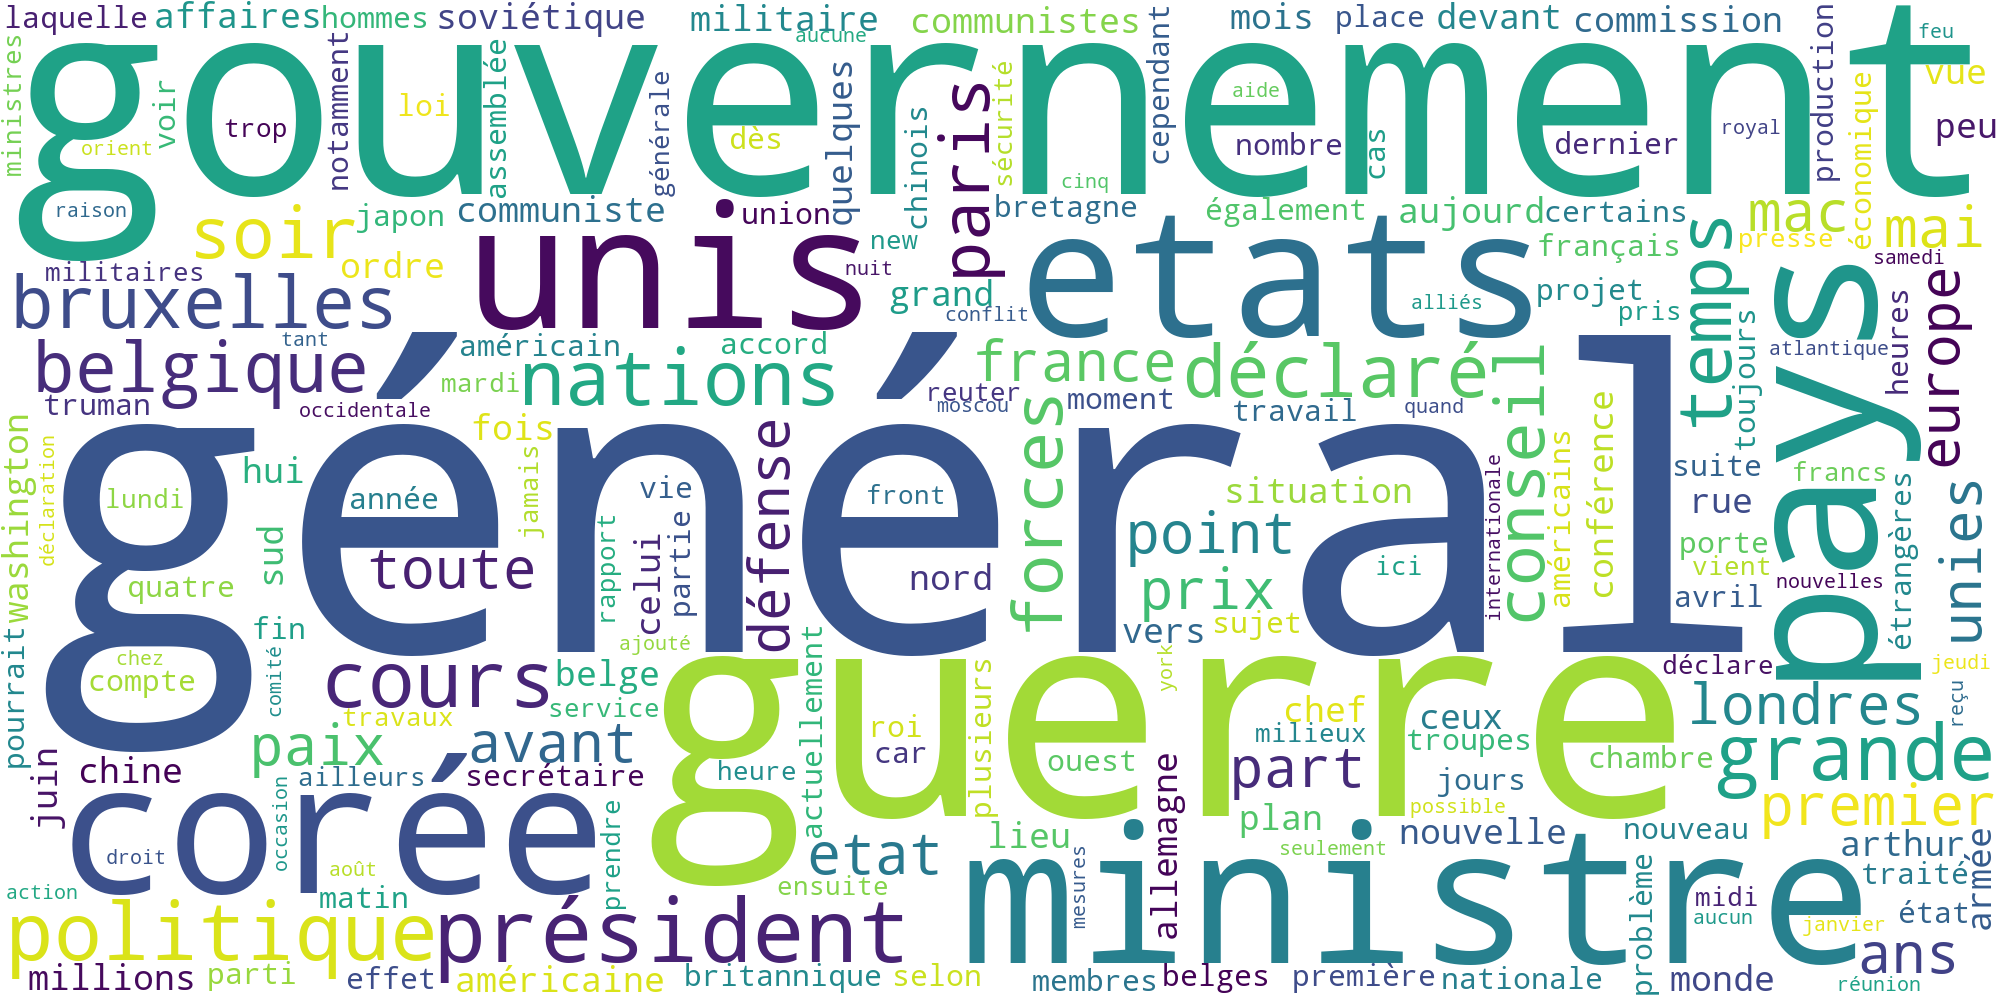

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))